In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('diabetes.csv')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
data = data[data['Glucose'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['SkinThickness'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BMI'] != 0]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


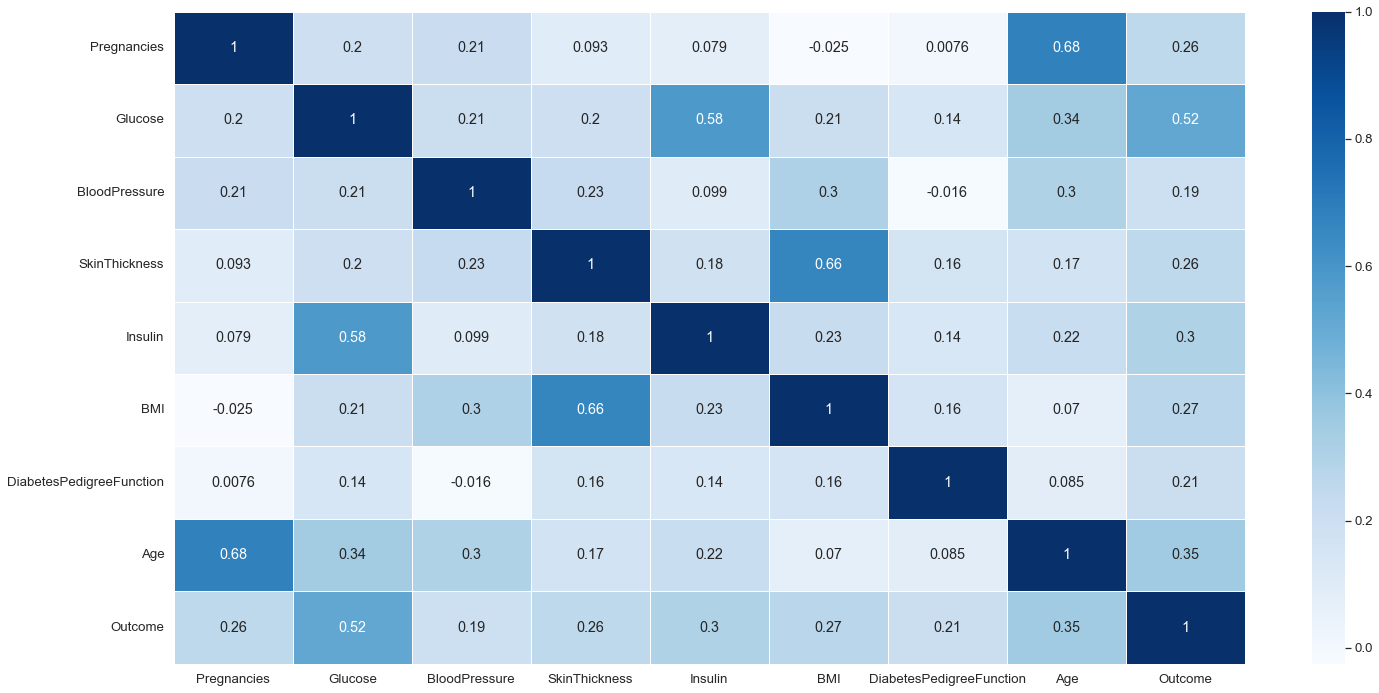

In [54]:
corr = data.corr()
sns.set(font_scale=1.2)
_, ax = plt.subplots(figsize = (24, 12))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=1, ax=ax)
plt.show()

In [55]:
# sns.set_palette('husl')
# sns.pairplot(data, hue='Outcome', markers='+')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

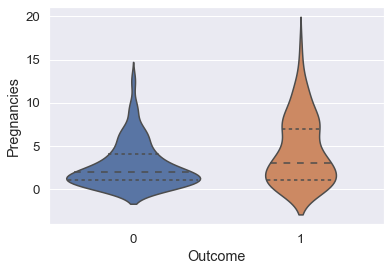

In [56]:
sns.violinplot(y='Pregnancies', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

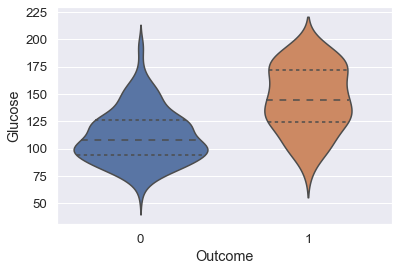

In [57]:
sns.violinplot(y='Glucose', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

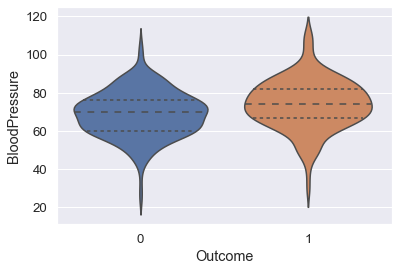

In [58]:
sns.violinplot(y='BloodPressure', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

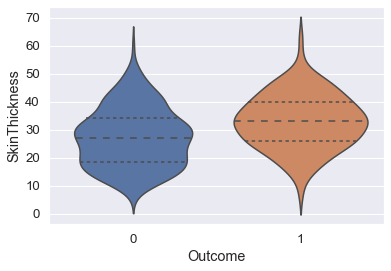

In [59]:
sns.violinplot(y='SkinThickness', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

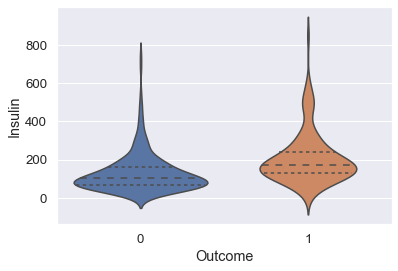

In [60]:
sns.violinplot(y='Insulin', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

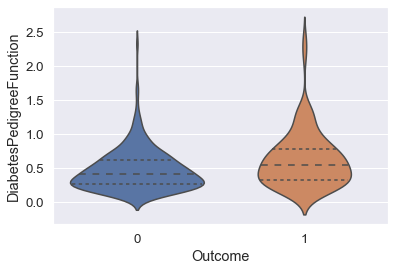

In [61]:
sns.violinplot(y='DiabetesPedigreeFunction', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

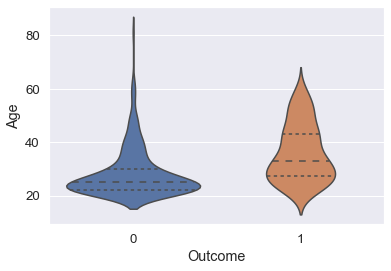

In [62]:
sns.violinplot(y='Age', x='Outcome', inner='quartile', data=data)

In [63]:
# Klasa statyczna zawierajaca metody przydatne do przetwarzania danych
class ProcessingData:

    # metoda tasujaca wiersze pd.DataFrame
    @staticmethod
    def shuffle(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # kazdy element od konca do poczatku
        for idx in range(len(df) - 1, 0, -1):
            # wybieramy losowo 'rand_idx', czyli nowe miejsce elementu
            rand_idx = random.randint(0, idx)
            # zamieniamy
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        # zwracamy potasowany zbior ze zresetowanymi indeksami
        return df.reset_index(drop=True)

    # metoda normalizujaca kolumny pd.DataFrame za pomoca normalizacji z uzyciem odchylenia standardowego
    @staticmethod
    def normalize_std(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using std normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # usuwam kolumne z klasami
        normalized = df.drop(labels=label, axis=1)
        # normalizuje wg wzoru z odchyleniem standardowym i zwracam zbior razem z wczesniej usunieta kolumna
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda normalizujaca kolumny pd.DataFrame za pomoca normalizacji minmax
    @staticmethod
    def normalize_minmax(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        # usuwam kolumne z klasami
        normalized = df.drop(labels=label, axis=1)
        # normalizuje wg wzoru z 'min' i 'max' i zwracam zbior razem z wczesniej usunieta kolumna
        normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
        return normalized.join(df[label])

    # metoda dzielaca pd.DataFrame na zbior treningowy oraz walidacyjny
    @staticmethod
    def split(df: pd.DataFrame, ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param ratio: float
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        # miejsce elementu dzielacego zbior w odpowiedniej proporcji wg 'ratio'
        cutoff = int(len(df) * ratio)
        # zwracam zbior treningowy i walidacyjny
        return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [64]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.shuffle(data)
shuffled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,90,62,12,43,27.2,0.580,24,0
1,10,68,106,23,49,35.5,0.285,47,0
2,7,142,60,33,190,28.8,0.687,61,0
3,2,83,65,28,66,36.8,0.629,24,0
4,0,105,64,41,142,41.5,0.173,22,0
...,...,...,...,...,...,...,...,...,...
387,1,81,72,18,40,26.6,0.283,24,0
388,2,83,66,23,50,32.2,0.497,22,0
389,1,122,90,51,220,49.7,0.325,31,1
390,1,131,64,14,415,23.7,0.389,21,0


In [65]:
normalized_data_std = ProcessingData.normalize_std(shuffled_data, 'Outcome')
normalized_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.716511,-1.057250,-0.693278,-1.630346,-0.951317,-0.837580,0.164851,-0.672968,0
1,2.085984,-1.770129,2.827823,-0.584363,-0.900830,0.343468,-0.689013,1.581762,0
2,1.151819,0.627737,-0.853328,0.366531,0.285623,-0.609908,0.474558,2.954207,0
3,-0.405123,-1.284075,-0.453203,-0.108916,-0.757782,0.528451,0.306679,-0.672968,0
4,-1.027899,-0.571196,-0.533228,1.127246,-0.118276,1.197237,-1.013193,-0.869031,0
...,...,...,...,...,...,...,...,...,...
387,-0.716511,-1.348882,0.106972,-1.059810,-0.976561,-0.922957,-0.694802,-0.672968,0
388,-0.405123,-1.284075,-0.373178,-0.584363,-0.892415,-0.126105,-0.075389,-0.869031,0
389,-0.716511,-0.020335,1.547423,2.078139,0.538059,2.364055,-0.573235,0.013254,1
390,-0.716511,0.271297,-0.533228,-1.440167,2.178898,-1.335612,-0.387990,-0.967063,0


In [66]:
# Test dla normalizacji std
normalized_training_data_std, normalized_validation_data_std = ProcessingData.split(normalized_data_std, 0.7)
normalized_training_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.716511,-1.057250,-0.693278,-1.630346,-0.951317,-0.837580,0.164851,-0.672968,0
1,2.085984,-1.770129,2.827823,-0.584363,-0.900830,0.343468,-0.689013,1.581762,0
2,1.151819,0.627737,-0.853328,0.366531,0.285623,-0.609908,0.474558,2.954207,0
3,-0.405123,-1.284075,-0.453203,-0.108916,-0.757782,0.528451,0.306679,-0.672968,0
4,-1.027899,-0.571196,-0.533228,1.127246,-0.118276,1.197237,-1.013193,-0.869031,0
...,...,...,...,...,...,...,...,...,...
269,-1.027899,0.465719,-2.453828,0.556709,0.100502,1.424909,5.108582,0.209318,1
270,-0.716511,-1.672918,-1.813628,-1.059810,-0.673637,-1.805185,-0.579024,-0.869031,0
271,0.840431,-0.473985,-2.133728,-0.869631,-0.219251,-1.292923,0.839259,0.405381,0
272,-0.093734,-0.733214,-0.213128,-0.584363,-0.631564,-0.211482,1.232905,-0.280841,0


In [67]:
normalized_validation_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.840431,-0.765617,-0.853328,-0.964720,-0.858757,-0.880268,-0.075389,0.111286,0
1,-0.716511,-1.122057,-3.254079,1.222335,-0.480102,3.118218,-0.078283,-0.476904,1
2,0.529042,-0.571196,0.106972,-0.013827,1.421588,0.542681,-1.053715,-0.280841,0
3,-0.716511,0.336105,2.507723,-0.108916,-0.135105,-0.040728,-0.836631,1.385699,1
4,2.085984,0.822158,1.067272,1.792871,0.681107,0.642287,1.383417,1.973889,1
...,...,...,...,...,...,...,...,...,...
113,-0.716511,-1.348882,0.106972,-1.059810,-0.976561,-0.922957,-0.694802,-0.672968,0
114,-0.405123,-1.284075,-0.373178,-0.584363,-0.892415,-0.126105,-0.075389,-0.869031,0
115,-0.716511,-0.020335,1.547423,2.078139,0.538059,2.364055,-0.573235,0.013254,1
116,-0.716511,0.271297,-0.533228,-1.440167,2.178898,-1.335612,-0.387990,-0.967063,0


In [68]:
normalized_data_minmax = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
normalized_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.239437,0.441860,0.089286,0.034856,0.184049,0.211991,0.050000,0
1,0.588235,0.084507,0.953488,0.285714,0.042067,0.353783,0.085653,0.433333,0
2,0.411765,0.605634,0.418605,0.464286,0.211538,0.216769,0.257816,0.666667,0
3,0.117647,0.190141,0.476744,0.375000,0.062500,0.380368,0.232976,0.050000,0
4,0.000000,0.345070,0.465116,0.607143,0.153846,0.476483,0.037687,0.016667,0
...,...,...,...,...,...,...,...,...,...
387,0.058824,0.176056,0.558140,0.196429,0.031250,0.171779,0.084797,0.050000,0
388,0.117647,0.190141,0.488372,0.285714,0.043269,0.286299,0.176445,0.016667,0
389,0.058824,0.464789,0.767442,0.785714,0.247596,0.644172,0.102784,0.166667,1
390,0.058824,0.528169,0.465116,0.125000,0.481971,0.112474,0.130193,0.000000,0


In [69]:
# Test dla normalizacji minmax
normalized_training_data_minmax, normalized_validation_data_minmax = ProcessingData.split(normalized_data_minmax, 0.7)
normalized_training_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.239437,0.441860,0.089286,0.034856,0.184049,0.211991,0.050000,0
1,0.588235,0.084507,0.953488,0.285714,0.042067,0.353783,0.085653,0.433333,0
2,0.411765,0.605634,0.418605,0.464286,0.211538,0.216769,0.257816,0.666667,0
3,0.117647,0.190141,0.476744,0.375000,0.062500,0.380368,0.232976,0.050000,0
4,0.000000,0.345070,0.465116,0.607143,0.153846,0.476483,0.037687,0.016667,0
...,...,...,...,...,...,...,...,...,...
269,0.000000,0.570423,0.186047,0.500000,0.185096,0.509202,0.943469,0.200000,1
270,0.058824,0.105634,0.279070,0.196429,0.074519,0.044990,0.101927,0.016667,0
271,0.352941,0.366197,0.232558,0.232143,0.139423,0.118609,0.311777,0.233333,0
272,0.176471,0.309859,0.511628,0.285714,0.080529,0.274029,0.370021,0.116667,0


In [70]:
normalized_validation_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.302817,0.418605,0.214286,0.048077,0.177914,0.176445,0.183333,0
1,0.058824,0.225352,0.069767,0.625000,0.102163,0.752556,0.176017,0.083333,1
2,0.294118,0.345070,0.558140,0.392857,0.373798,0.382413,0.031692,0.116667,0
3,0.058824,0.542254,0.906977,0.375000,0.151442,0.298569,0.063812,0.400000,1
4,0.588235,0.647887,0.697674,0.732143,0.268029,0.396728,0.392291,0.500000,1
...,...,...,...,...,...,...,...,...,...
113,0.058824,0.176056,0.558140,0.196429,0.031250,0.171779,0.084797,0.050000,0
114,0.117647,0.190141,0.488372,0.285714,0.043269,0.286299,0.176445,0.016667,0
115,0.058824,0.464789,0.767442,0.785714,0.247596,0.644172,0.102784,0.166667,1
116,0.058824,0.528169,0.465116,0.125000,0.481971,0.112474,0.130193,0.000000,0


In [71]:
# Klasa NaiveBayes zawierajaca klasyfikator Bayesa oraz metody pomocnicze
from functools import reduce

class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    # labels - unikalne wartosci z podanej kolumny, ktora chcemy przewidzieć (czyli u nas 0, 1)
    labels: list[float] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza liczaca srednia wartosc w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        # czyli suma wszystkich wartosci w kolumnie przez dlugosc kolumny
        return sum(column) / len(column)

    # metoda pomocnicza liczaca odchylenie standardowe wartosci w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczajaca gestosc prawdopodobienstwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns its Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return Gaussian probability: float
        """
        # rozklad normalny / Gaussa
        return math.exp(-(x - m) ** 2 / (2 * sd ** 2)) / (math.sqrt(2 * math.pi) * sd)

    # metoda obliczajaca wartosci przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        # lista wartosci oraz lista unikalnych wartosci z podanej kolumny 'label'
        self.values = []
        self.labels = df[label].unique()

        # dla kazdej unikalnej wartosci z przewidywanej kolumny (czyli u nas dla 0 i 1)
        for category in self.labels:
            # wartosci ktorych unikalna wartosc kolumny 'label' to 'category', czyli podzial na czesci ktore maja 0 i 1
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            # pary: [srednia, odchylenie std] dla kazdej kolumny dla kazdej kategorii 'category_values'
            column = [[self.mean(item), self.std_dev(item, self.mean(item))] for _, item in category_values.items()]
            # dodanie do 'values' wszystkich par [srednia, odchylenie std]
            self.values.append(column)

    # metoda przewidujaca etykiety klas probek
    def predict(self, sample: pd.Series, label: str) -> float:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        # dla kazdej kategorii w 'values'
        for category in self.values:
            category_pairs = []
            # pair to para [srednia, odchylenie]
            # x to odpowiednia wartosc w 'sample'
            for pair, x in zip(category, sample):
                # dodajemy kolejne obliczone Gaussy
                category_pairs.append(self.density(x, pair[0], pair[1]))
            # liczenie prawdopodobienstw czyli wymnazamy ze soba kolejne odpowiednie Gaussy
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        # naszym indeksem jest indeks najwiekszego prawdopodobienstwa
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        # zwracamy przewidywany wynik z 'labels' (u nas 0 lub 1)
        return self.labels[idx]

    # metoda testujaca dokladnosc przewidywan
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        # iterrows() jest uzywane do iteracji wierszy dataframe'a
        for _, row in validation_set.iterrows():
            # jesli poprawnie przewidzimy etykiete (czyli 0 lub 1)
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1
        # informacja podsumowujaca
        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [72]:
# Test Bayesa dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 75.42%; 89/118
Accuracy: 75.42%; 89/118
Accuracy: 76.27%; 90/118
Accuracy: 69.49%; 82/118
Accuracy: 76.27%; 90/118


In [73]:
# Test Bayesa dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 73.73%; 87/118
Accuracy: 79.66%; 94/118
Accuracy: 72.88%; 86/118
Accuracy: 70.34%; 83/118
Accuracy: 70.34%; 83/118


In [74]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(training_data, 'Outcome')
    NB.test(validation_data, 'Outcome')

Accuracy: 72.88%; 86/118
Accuracy: 73.73%; 87/118
Accuracy: 75.42%; 89/118
Accuracy: 69.49%; 82/118
Accuracy: 74.58%; 88/118


In [75]:
# # Klasa statyczna KNN zawierajaca klasyfikator KNN oraz metody pomocnicze
# from collections import Counter
#
# class KNN:
#
#     # metoda obliczajaca odleglosc miedzy probkami za pomoca metryki
#     @staticmethod
#     def distance(x: pd.Series, y: pd.Series, m: int, label: str) -> float:
#         """
#         :param x: pd.Series - a record from a dataset to calculate the distance
#         :param y: pd.Series - a record from a dataset to calculate the distance
#         :param m: int - to calculate the mth root in Euclidean metric
#         :param label: str - column with class labels
#         :return: float - the distance between two records
#         """
#         s = 0
#         x = x.drop(labels=label)
#         y = y.drop(labels=label)
#         # odleglosc miedzy dwoma wektorami, czyli pierwiastek sumy wartosci bezwzglednych kwadratow roznic kolejnych wspolrzednych
#         for xi, yi in zip(x, y):
#             s += pow(abs(xi - yi), m)
#         return pow(s, 1 / m)
#
#     # metoda przewidujaca etykiete klasy probki na podstawie etykiet jej k-najblizszych sasiadow
#     @staticmethod
#     def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
#         """
#         :param sample: pd.Series - a record from the validation dataset
#         :param training_set: pd.DataFrame - training dataset
#         :param k: int - k-nearest elements
#         :param m: int - to pass into KNN.distance
#         :param label: str - name of the label that we want to predict
#         :return: str - predicted label of the object
#         """
#         # pary (dystans, outcome) dla zbioru treningowego
#         distances = [(KNN.distance(sample, training_set.iloc[idx], m, label), training_set.iloc[idx][label]) for idx in training_set.index]
#         # wybieramy 'k' najblizszych wynikow
#         distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
#         # zwracamy etykiete, ktora wytypowalismy najwiecej razy
#         return max(dict(Counter(elem[1] for elem in distances)))
#
#     # metoda testujaca dokladnosc dzialania
#     @staticmethod
#     def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
#         """
#         :param training_set: pd.Series - a record from the validation dataset
#         :param validation_set: pd.DataFrame - training dataset
#         :param k0: int - starting value of k to pass into KNN.cluster
#         :param kn: int - end value of k to pass into KNN.cluster
#         :param m: int - to pass into KNN.cluster
#         :param label: str - name of the label that we want to predict
#         :return: None
#         """
#         # testujemy dla 'k' od 'k0' do 'kn'
#         for k in range(k0, kn + 1):
#             correct = 0
#             # bierzemy kazdy sample ze zbioru walidacyjnego
#             for sample in validation_set.iloc:
#                 x = KNN.cluster(sample, training_set, k, m, label)
#                 # sprawdzamy czy przewidziany jest taki jak rzeczywisty
#                 if x == sample[label]:
#                     correct += 1
#             # informacja podsumowujaca
#             print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [76]:
# # Test KNN dla danych znormalizowanych std:
# for i in range(2):
#     shuffled_data = ProcessingData.shuffle(data)
#     normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
#     normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
#     KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

In [77]:
# # Test KNN dla danych znormalizowanych minmax:
# for i in range(2):
#     shuffled_data = ProcessingData.shuffle(data)
#     normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
#     normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
#     KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

In [78]:
# # Test KNN dla danych nieznormalizowanych:
# for i in range(2):
#     shuffled_data = ProcessingData.shuffle(data)
#     training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
#     KNN.test(training_set=training_data, validation_set=validation_data, k0=2, kn=4, m=2, label='Outcome')

In [79]:
# Klasa SoftSetClassifierMean zawierajaca klasyfikator miekki korzystajacy ze sredniej arytmetycznej oraz metody pomocnicze
class SoftSetClassifierMean:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    # lista etykiet
    labels: list[str] = []
    # lista par 0, 1 dla kazdej kolumny i kazdej cechy
    pairs: list[list[list[int, int]]] = []
    # lista srednich dla kazdej kolumny i kazdej cechy
    means: list[list[float]] = []

    # metoda pomocnicza obliczajaca srednie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        # czyli zwykla suma przez ilosc skladnikow
        return sum(column) / len(column)

    # metoda tworzaca tabele wazona zbioru miekkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        # lista unikalnych wartosci z podanej kolumny 'label'
        # ma byc zawsze ta sama kolejnosc wiec sortujemy
        self.labels = sorted(df[label].unique())

        # 'category' to 0 i 1
        for category in self.labels:
            # wartosci ktorych unikalna wartosc kolumny 'label' to 'category'
            # czyli podzial na czesci ktore maja 0 i 1
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            # item to wszystkie wartosci z danej kolumny
            for _, item in category_values.items():
                # srednia z kolumny, dodajemy ja do listy srednich
                mean = self.mean(item)
                temp_mean.append(mean)
                len_lower = 0
                len_upper = 0
                # zliczamy elementy wieksze od sredniej i mniejsze od sredniej
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1

                # jesli jest tyle samo powyzej srendiej co ponizej to
                # wybieramy losowo pare [0, 1] lub [1, 0]
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                # jesli wiecej powyzej sredniej to zapisujemy pare [1, 0]
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                # jesli wiecej ponizej sredniej to zapisujemy pare [0, 1]
                else:
                    temp_pair.append([0, 1])

            # uzupelniamy listy wszystkich 'srednich' i wszystkich 'par'
            self.means.append(temp_mean)
            self.pairs.append(temp_pair)

    # metoda przewidujaca etykiete klasy probki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        # liczenie elementow dla sampla dla kazdej z klas (0, 1)

        sample = sample.drop(labels=label)
        probabilities = []

        # bierzemy po kolei odpowiednie pary i srednie
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            # bierzemy odpowiednia srednia i wartosc z sample'a
            for m, x in zip(mean, sample):
                # jesli element rowny sredniej
                # wybieramy losowo pare [0, 1] lub [1, 0]
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                # jesli element wiekszy od sredniej to zapisujemy pare [1, 0]
                elif x > m:
                    sample_pairs.append([1, 0])
                # jesli element mniejszy od sredniej to zapisujemy pare [0, 1]
                else:
                    sample_pairs.append([0, 1])
            temp = []

            # liczenie prawdopodobienstwa dla kazdej klasy
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))

        # naszym indeksem jest indeks najwiekszego prawdopodobienstwa
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        # zwracamy najprawdopodobniejszy wynik z 'labels' (u nas 0 lub 1)
        return self.labels[idx]

    # metoda testujaca dokladnosc dzialania Klasyfikatora miekkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        # true negative
        tn = 0
        # false positive
        fp = 0
        # false negative
        fn = 0
        # true positive
        tp = 0

        # iterrows() jest uzywane do iteracji wieszy dataframe'a
        for _, row in validation_set.iterrows():
            result = self.predict(sample=row, label=label)
            outcome = row[label]

            # zliczenie przypadków
            if outcome == 0:
                if result == 0:
                    tn += 1
                elif result == 1:
                    fp += 1
            else:
                if result == 1:
                    tp += 1
                elif result == 0:
                    fn += 1

        # informacja podsumowujaca
        print(f'Accuracy for all: {tn + tp}/{tn + fp + fn + tp}; {(tn + tp) / (tn + fp + fn + tp) * 100:0.2f}%')

        # Tworzenie tablicy pomyłek
        cf_matrix = np.array([[tn, fp],
                              [fn, tp]])
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
        group_counts = [f'{value:0.0f}' for value in cf_matrix.flatten()]
        group_percentages = [f'{value:.2%}' for value in cf_matrix.flatten() / np.sum(cf_matrix)]

        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

        labels = np.asarray(labels).reshape(2,2)

        plt.figure(figsize=(16, 12))
        sns.set(font_scale=1.4)
        plot = sns.heatmap(cf_matrix, annot=labels, annot_kws={'size': 16}, fmt='', cmap='Blues')
        plot.set_title('Confusion matrix')
        plot.set_xlabel('Predicted outcome')
        plot.set_ylabel('True outcome')
        plt.show()

Accuracy for all: 82/118; 69.49%


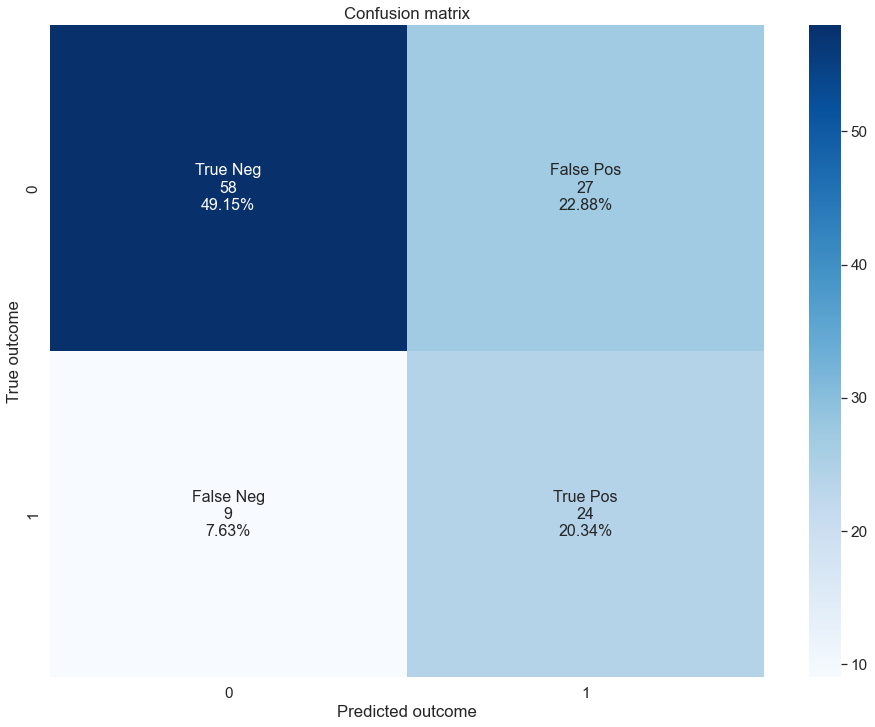

Accuracy for all: 47/118; 39.83%


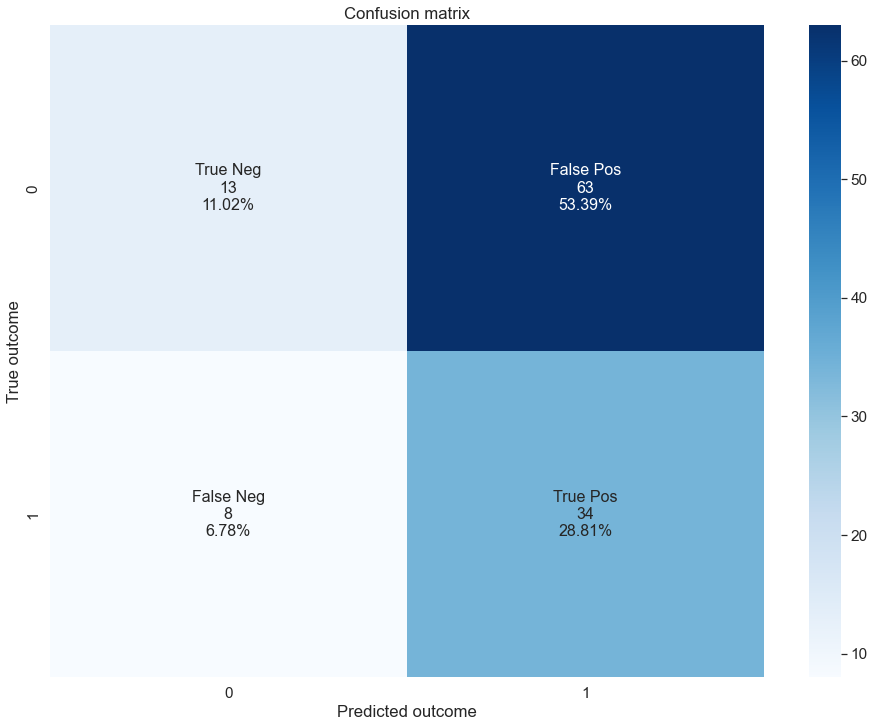

Accuracy for all: 49/118; 41.53%


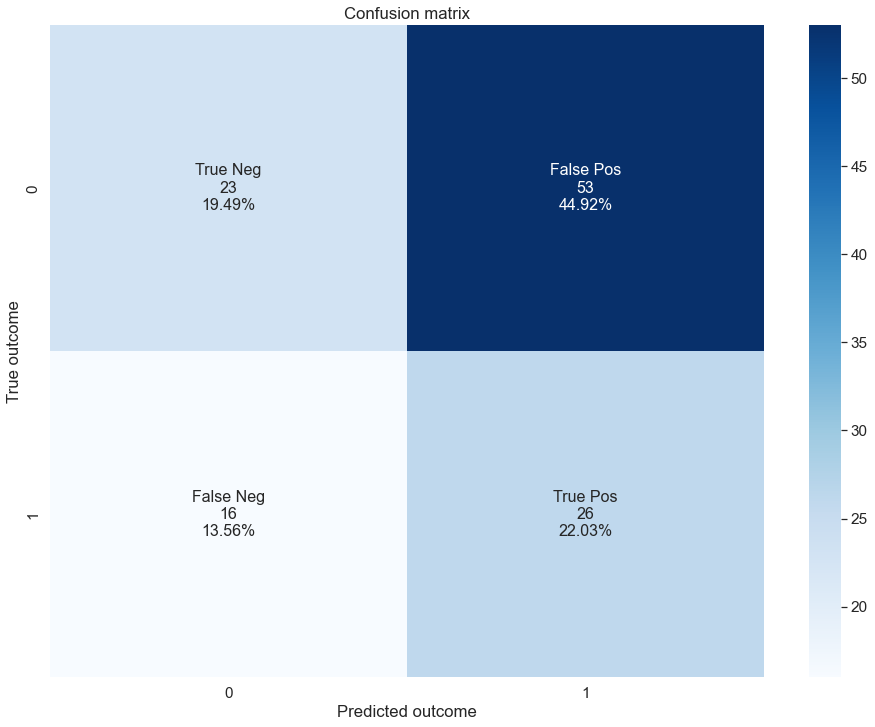

Accuracy for all: 52/118; 44.07%


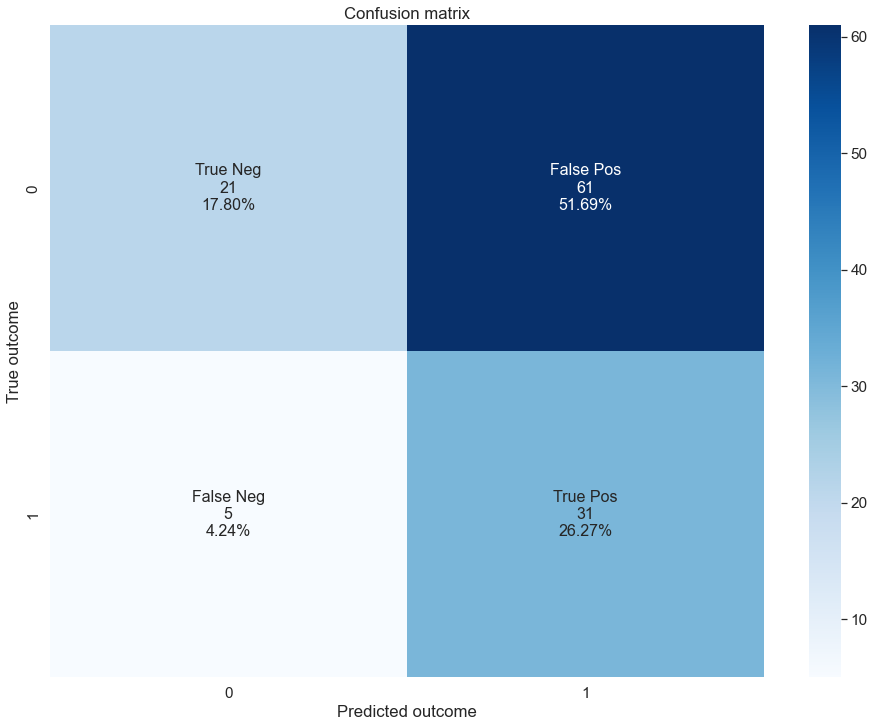

Accuracy for all: 56/118; 47.46%


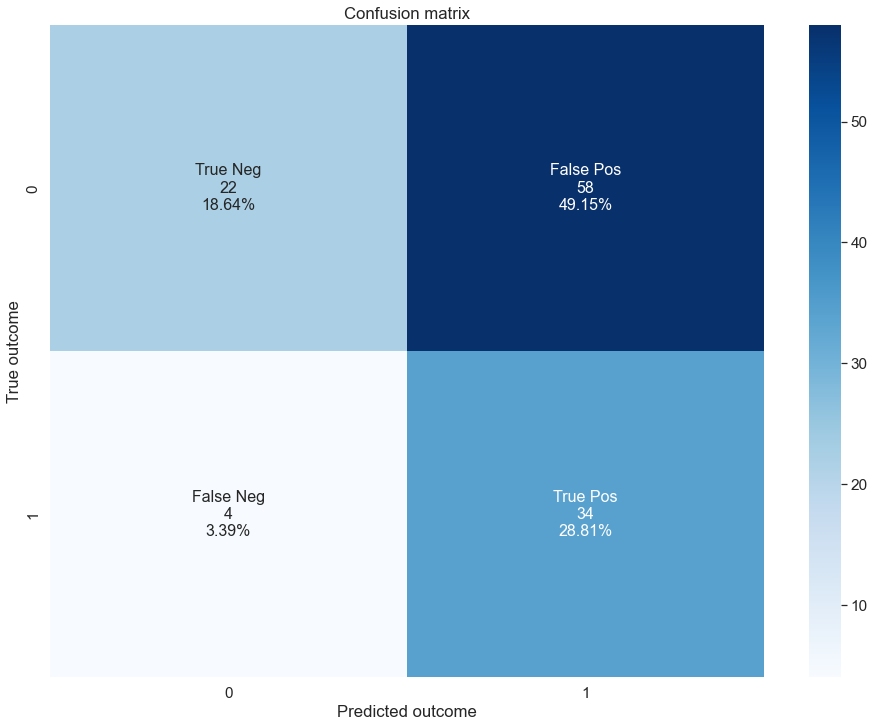

In [80]:
# Test Klasyfikatora miekkiego ze srednia dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy for all: 61/118; 51.69%


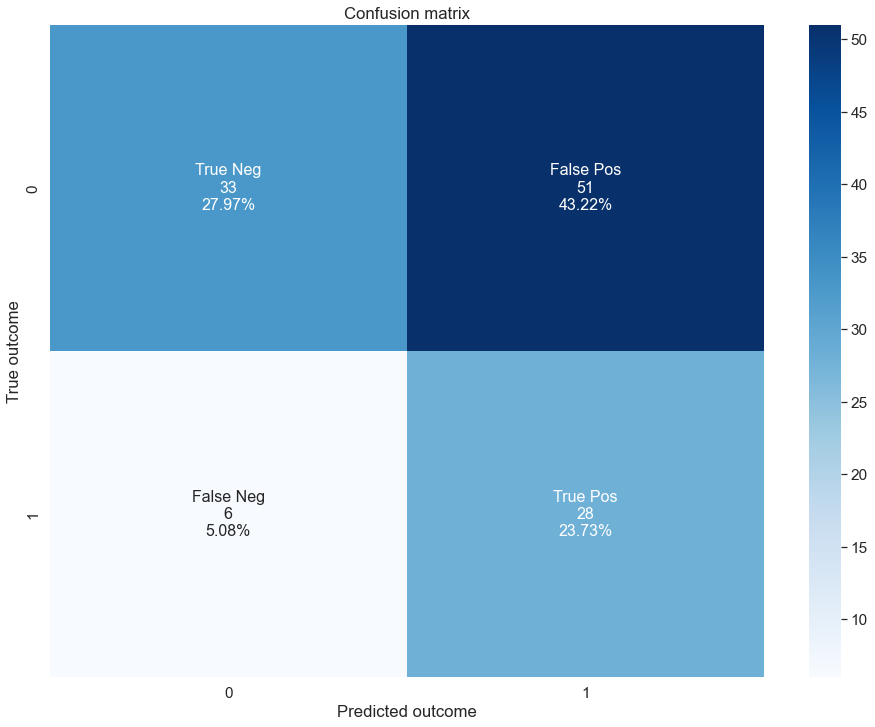

Accuracy for all: 39/118; 33.05%


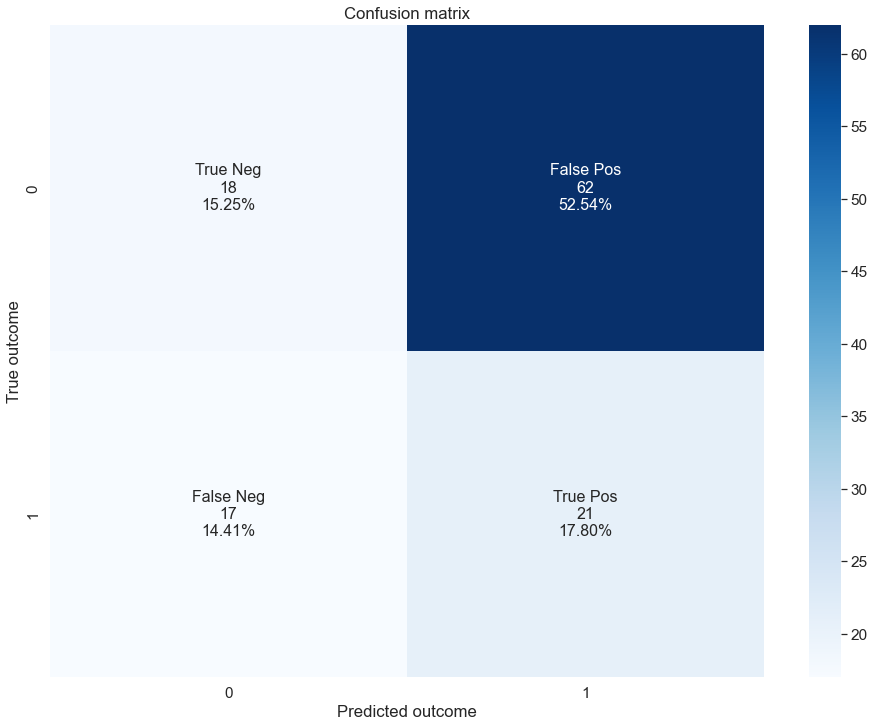

Accuracy for all: 51/118; 43.22%


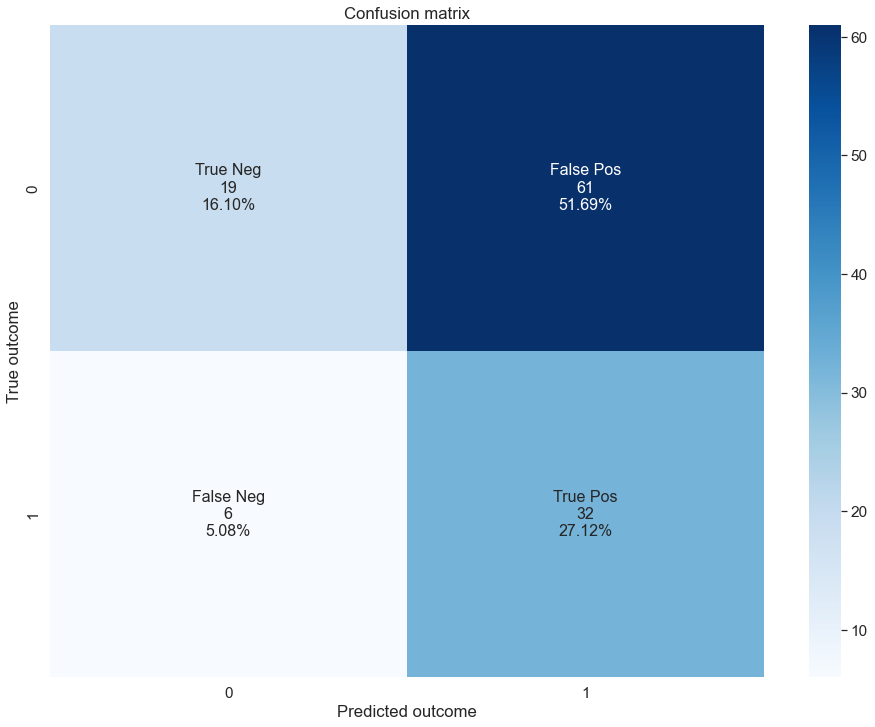

Accuracy for all: 59/118; 50.00%


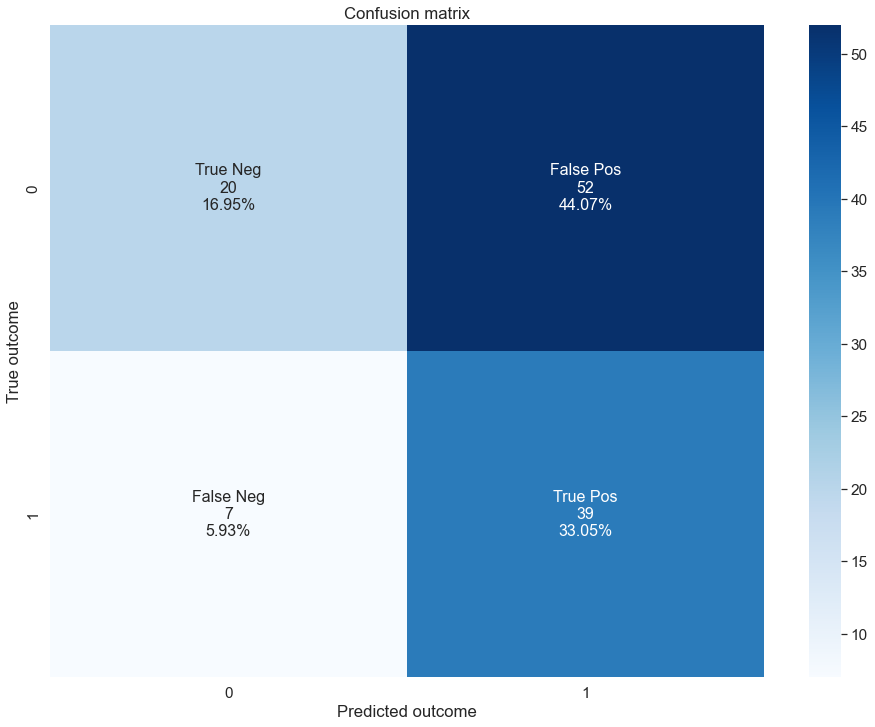

Accuracy for all: 38/118; 32.20%


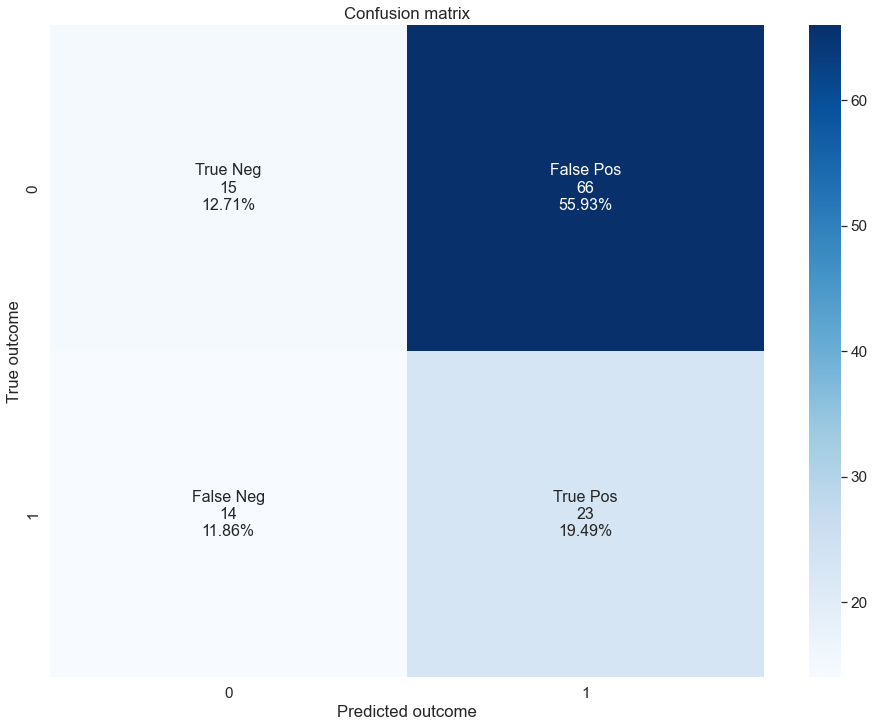

In [81]:
# Test Klasyfikatora miekkiego ze srednia dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy for all: 55/118; 46.61%


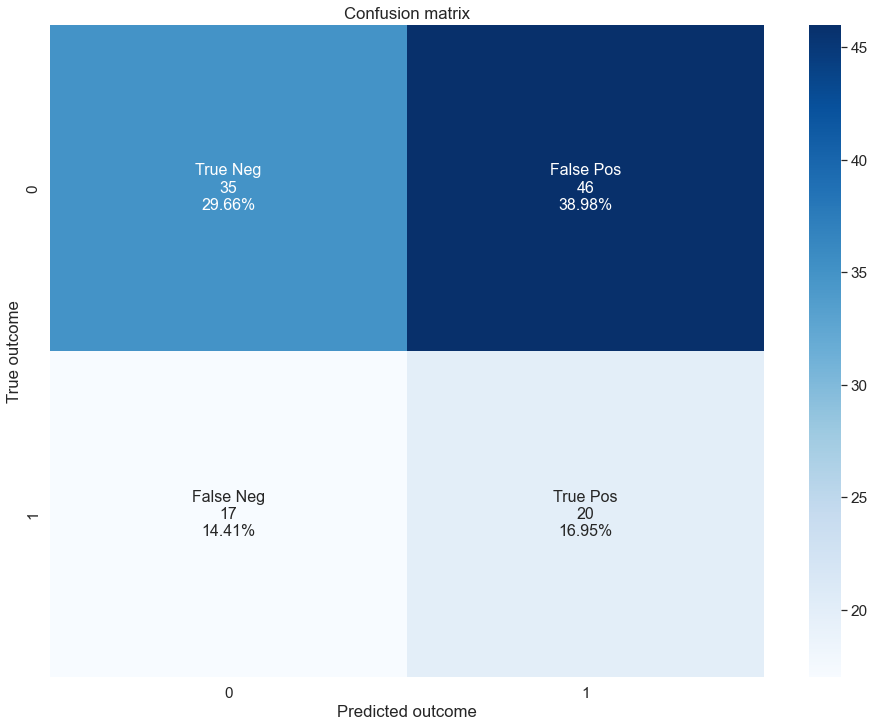

Accuracy for all: 48/118; 40.68%


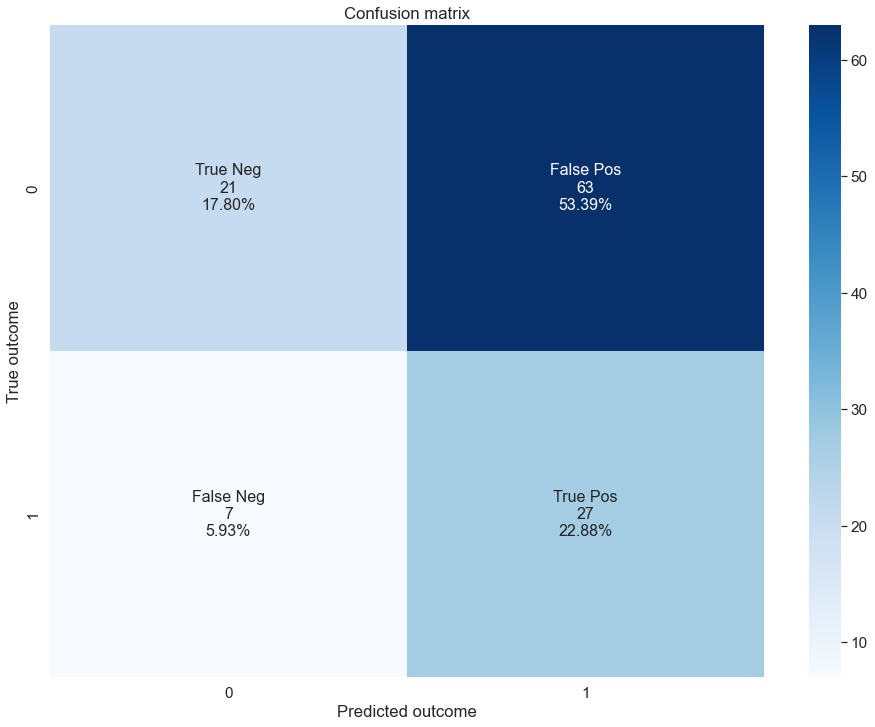

Accuracy for all: 70/118; 59.32%


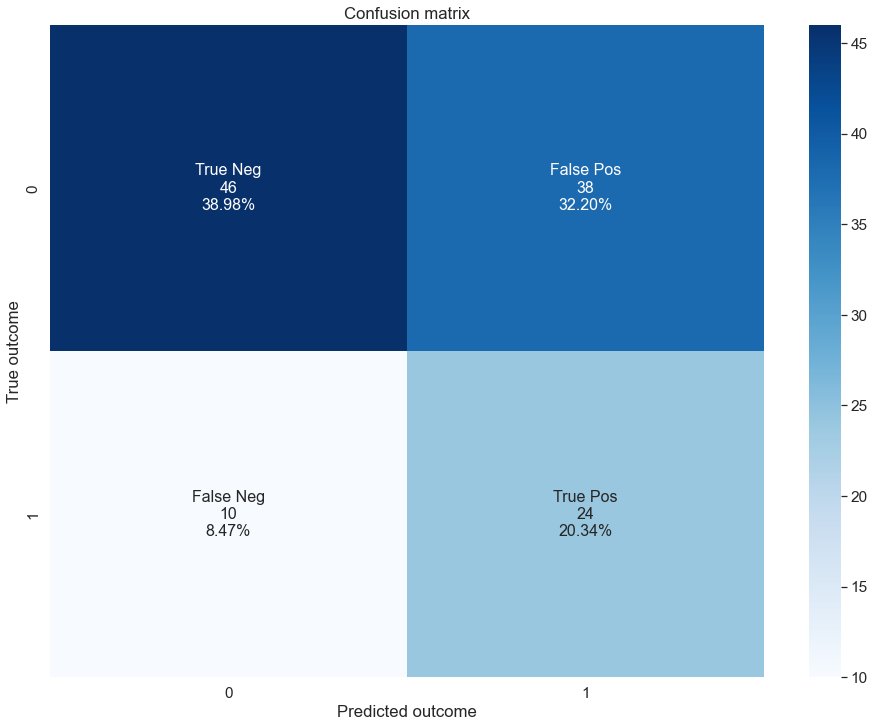

Accuracy for all: 46/118; 38.98%


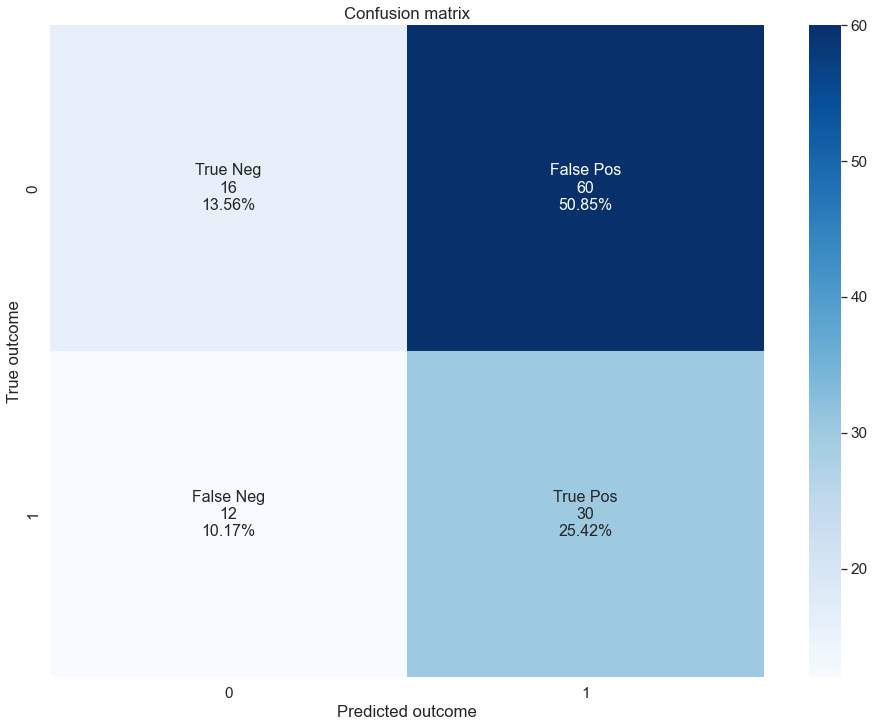

Accuracy for all: 60/118; 50.85%


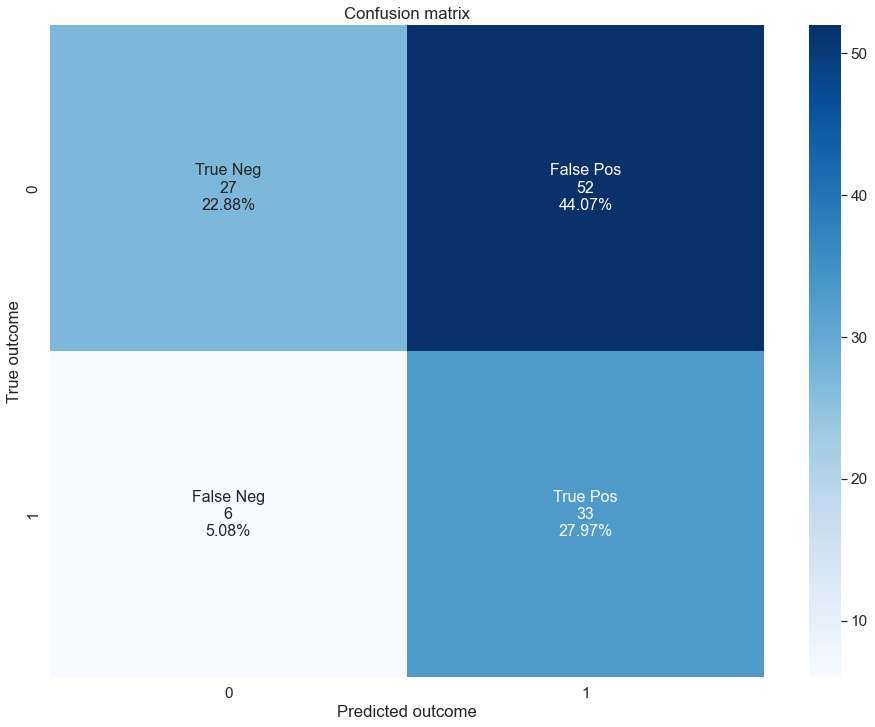

In [82]:
# Test Klasyfikatora miekkiego ze srednia dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

In [83]:
# Klasa SoftSetClassifierPercentage zawierajaca klasyfikator miekki korzystajacy z procentow oraz metody pomocnicze
class SoftSetClassifierPercentage:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores pairs of values between 0 and 1 for every label for every column
    minmaxs - stores min and max pairs of values for every label for every column
    """
    # lista etykiet
    labels: list[str] = []
    # lista par 0, 1 dla kazdej kolumny i kazdej cechy
    pairs: list[list[list[int, int]]] = []
    # lista min'ow i max'ow dla kazdej kolumny i kazdej cechy
    minmaxs: list[list[list[float, float]]] = []

    # metoda pomocnicza obliczajaca srednie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        # czyli zwykla suma przez ilosc skladnikow
        return sum(column) / len(column)

    # metoda tworzaca tabele wazona zbioru miekkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.minmaxs = []
        # lista unikalnych wartosci z podanej kolumny 'label'
        # ma byc zawsze ta sama kolejnosc wiec sortujemy
        self.labels = sorted(df[label].unique())

        # 'category' to 0 i 1
        for category in self.labels:
            # wartosci ktorych unikalna wartosc kolumny 'label' to 'category'
            # czyli podzial na czesci ktore maja 0 i 1
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_minmax = []
            temp_pair = []
            # item to wszystkie wartosci z danej kolumny
            for _, item in category_values.items():
                # minimum z kolumny
                min_t = min(item)
                # maximum z kolumny
                max_t = max(item)
                temp_minmax.append([min_t, max_t])
                # srednia
                mean = self.mean(item)
                len_lower = 0
                len_upper = 0
                # zliczamy elementy wieksze od sredniej i mniejsze od sredniej
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1

                # jesli jest tyle samo powyzej sredniej, co ponizej to
                # wybieramy losowo pare [0, 1] lub [1, 0]
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                # jesli wiecej powyzej sredniej to zapisujemy pare [1, 0]
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                # jesli wiecej ponizej sredniej to zapisujemy pare [0, 1]
                else:
                    temp_pair.append([0, 1])
            # uzupelniamy listy wszystkich 'minmaxow' i wszystkich 'par'
            self.minmaxs.append(temp_minmax)
            self.pairs.append(temp_pair)

    # metoda przewidujaca etykiete klasy probki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        # liczenie elementow dla sampla dla kazdej z klas (0, 1)

        sample = sample.drop(labels=label)
        probabilities = []

        # bierzemy po kolei odpowiednie pary i srednie
        for category, minmax in zip(self.pairs, self.minmaxs):
            sample_pairs = []
            # bierzemy odpowiednia pare minmax i wartosc z sample'a
            for pair, x in zip(minmax, sample):
                # proportion = (wartosc_sampla - min) / (max - min)
                proportion = (x - pair[0]) / (pair[1] - pair[0])
                # dodajemy liste [1 - prop, prop] do listy wszytskich par
                sample_pairs.append([1 - proportion, proportion])

            temp = []
            # liczenie prawdopodobienstwa dla kazdej klasy
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        # naszym indeksem jest indeks najwiekszego prawdopodobienstwa
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        # zwracamy najprawdopodobniejszy wynik z 'labels' (u nas 0 lub 1)
        return self.labels[idx]

    # metoda testujaca dokladnosc dzialania Klasyfikatora miekkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        # true negative
        tn = 0
        # false positive
        fp = 0
        # false negative
        fn = 0
        # true positive
        tp = 0

        # iterrows() jest uzywane do iteracji wieszy dataframe'a
        for _, row in validation_set.iterrows():
            result = self.predict(sample=row, label=label)
            outcome = row[label]

            # zliczenie przypadków
            if outcome == 0:
                if result == 0:
                    tn += 1
                elif result == 1:
                    fp += 1
            else:
                if result == 1:
                    tp += 1
                elif result == 0:
                    fn += 1

        # informacja podsumowujaca
        print(f'Accuracy for all: {tn + tp}/{tn + fp + fn + tp}; {(tn + tp) / (tn + fp + fn + tp) * 100:0.2f}%')

        # Tworzenie tablicy pomyłek
        cf_matrix = np.array([[tn, fp],
                              [fn, tp]])
        group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
        group_counts = [f'{value:0.0f}' for value in cf_matrix.flatten()]
        group_percentages = [f'{value:.2%}' for value in cf_matrix.flatten() / np.sum(cf_matrix)]

        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

        labels = np.asarray(labels).reshape(2,2)

        plt.figure(figsize=(16, 12))
        sns.set(font_scale=1.4)
        plot = sns.heatmap(cf_matrix, annot=labels, annot_kws={'size': 16}, fmt='', cmap='Blues')
        plot.set_title('Confusion matrix')
        plot.set_xlabel('Predicted outcome')
        plot.set_ylabel('True outcome')
        plt.show()

Accuracy for all: 45/118; 38.14%


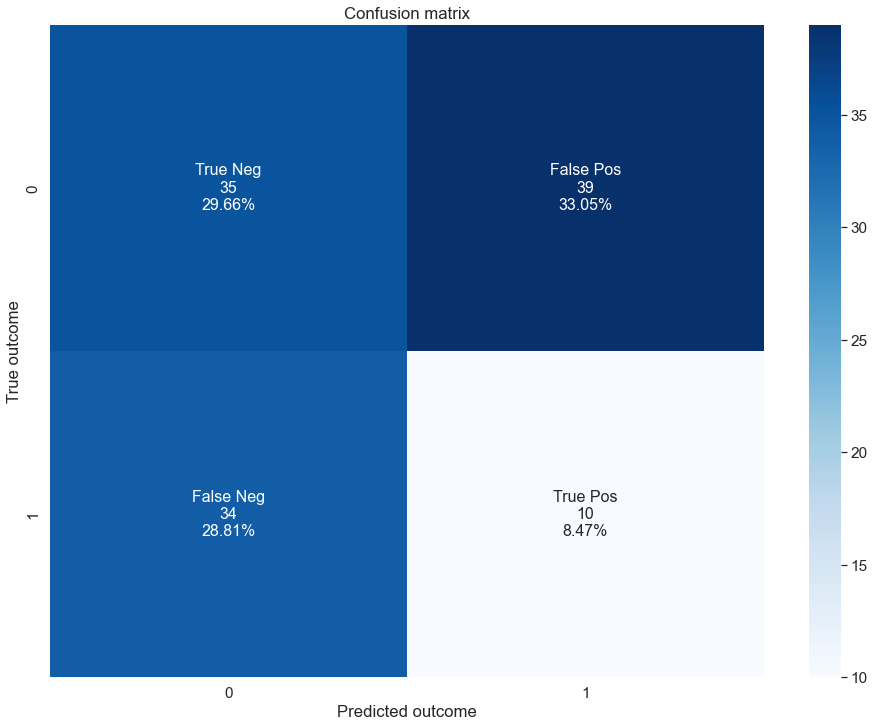

Accuracy for all: 72/118; 61.02%


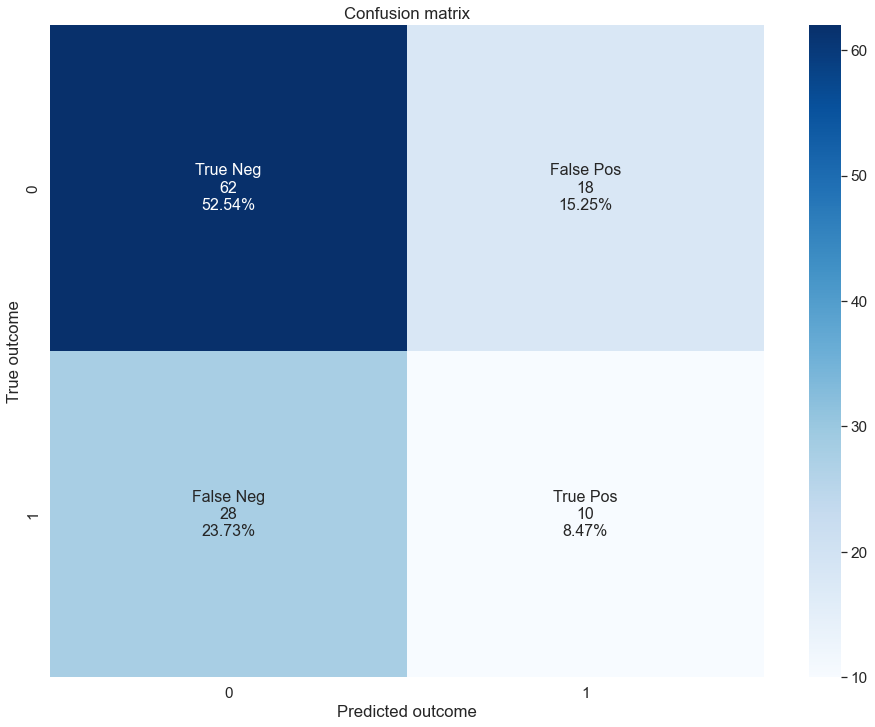

Accuracy for all: 81/118; 68.64%


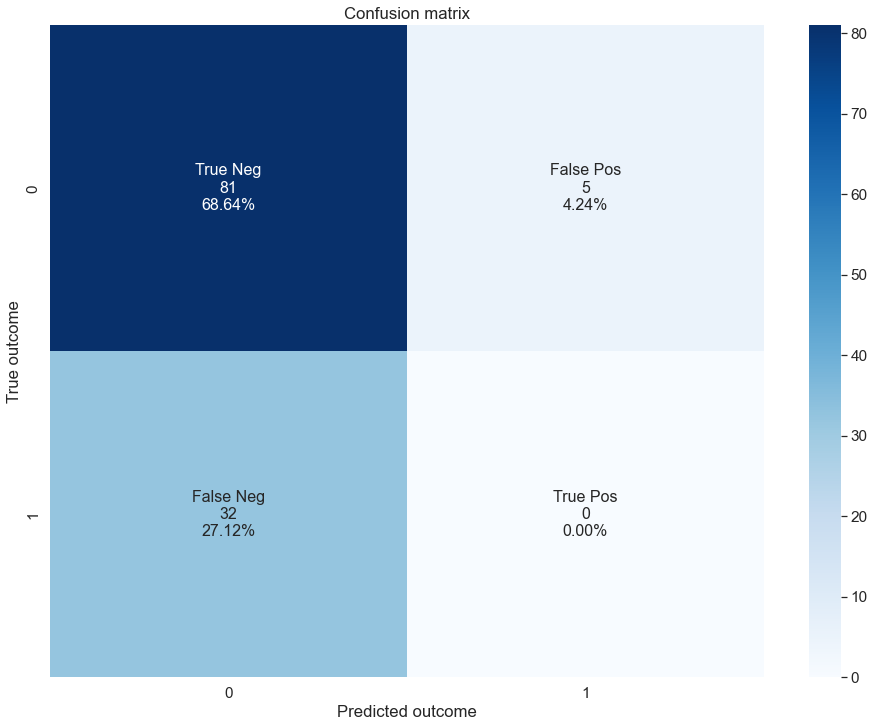

Accuracy for all: 36/118; 30.51%


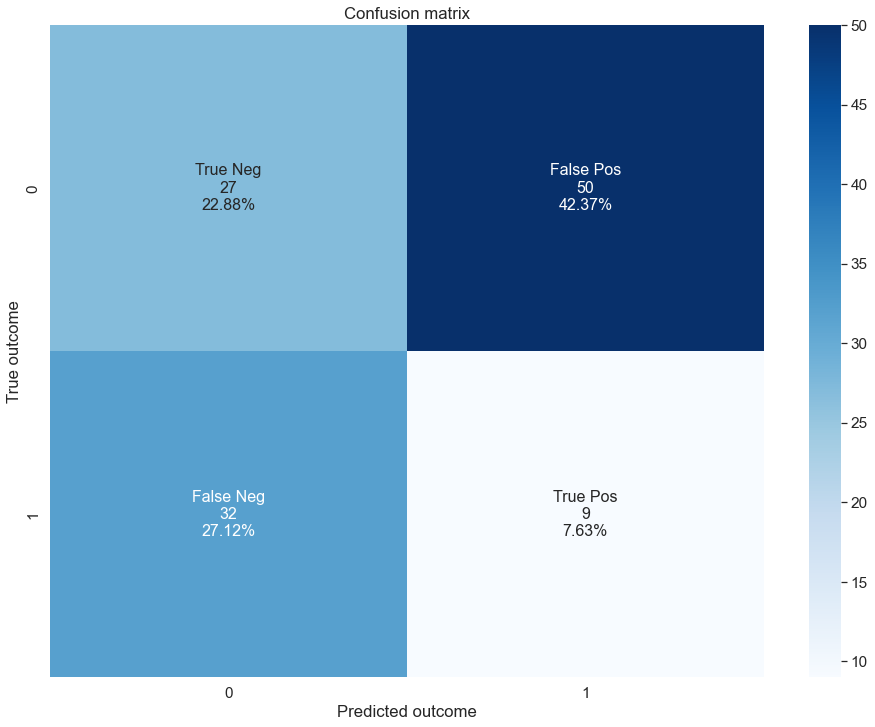

Accuracy for all: 74/118; 62.71%


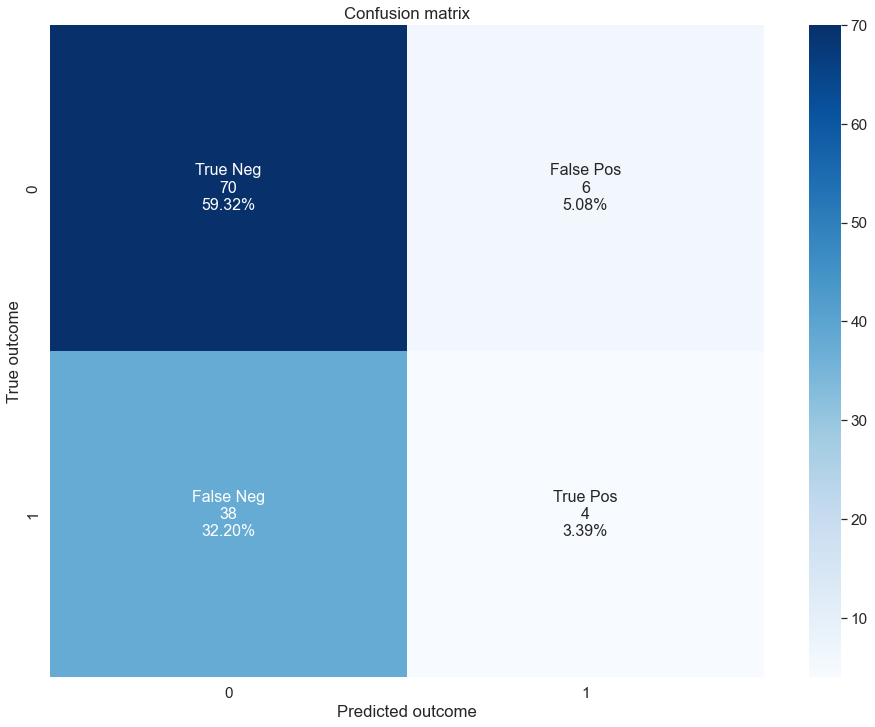

In [84]:
# Test Klasyfikatora miekkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy for all: 63/118; 53.39%


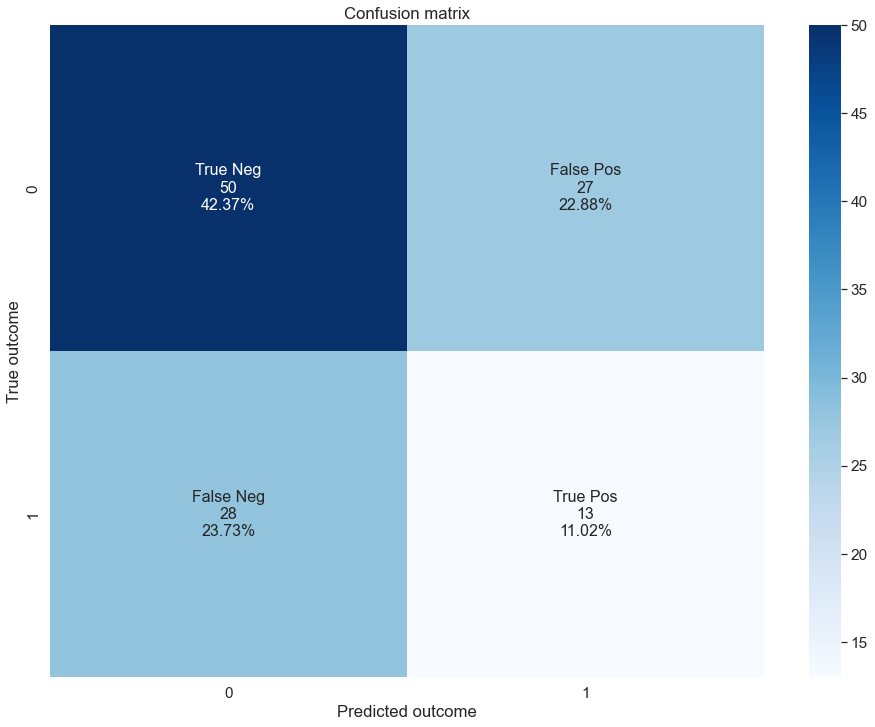

Accuracy for all: 41/118; 34.75%


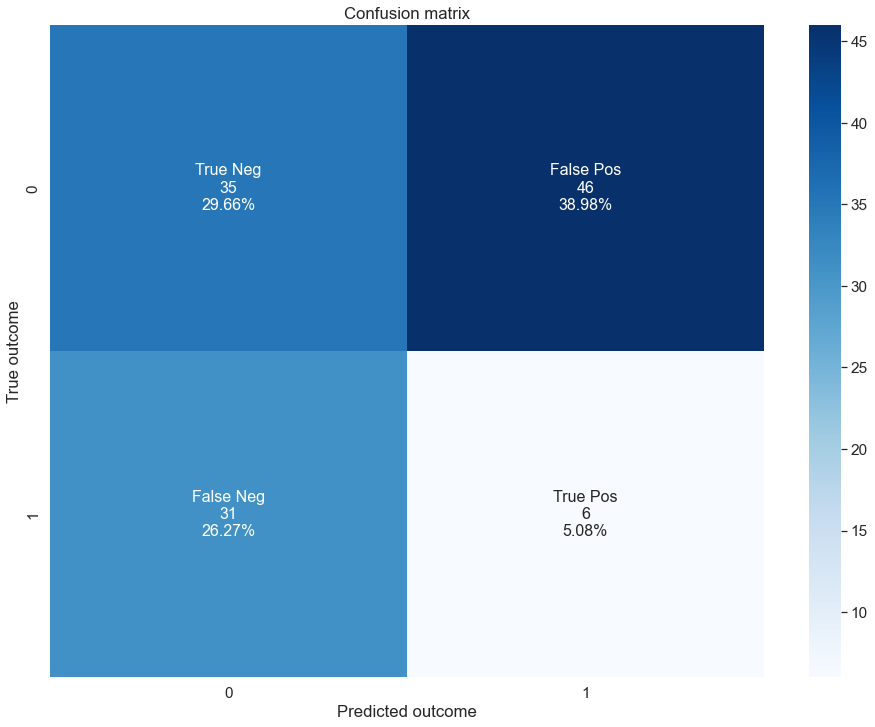

Accuracy for all: 80/118; 67.80%


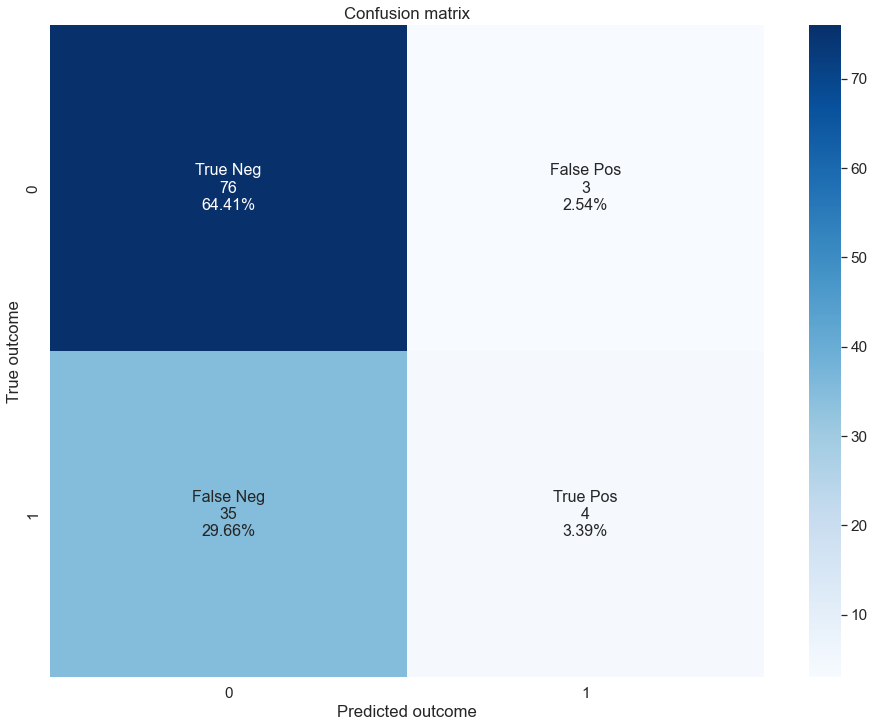

Accuracy for all: 40/118; 33.90%


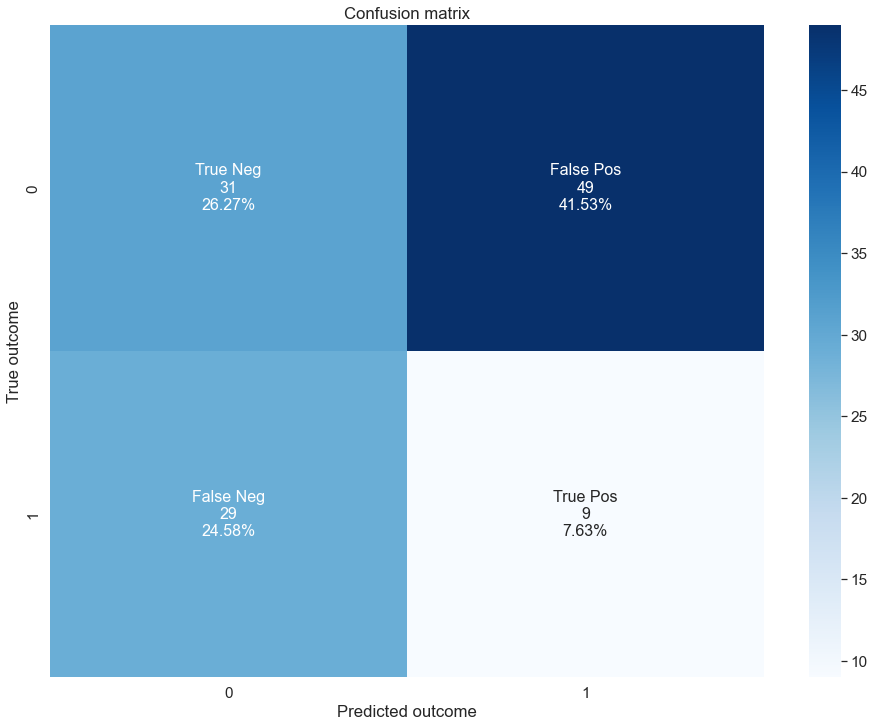

Accuracy for all: 31/118; 26.27%


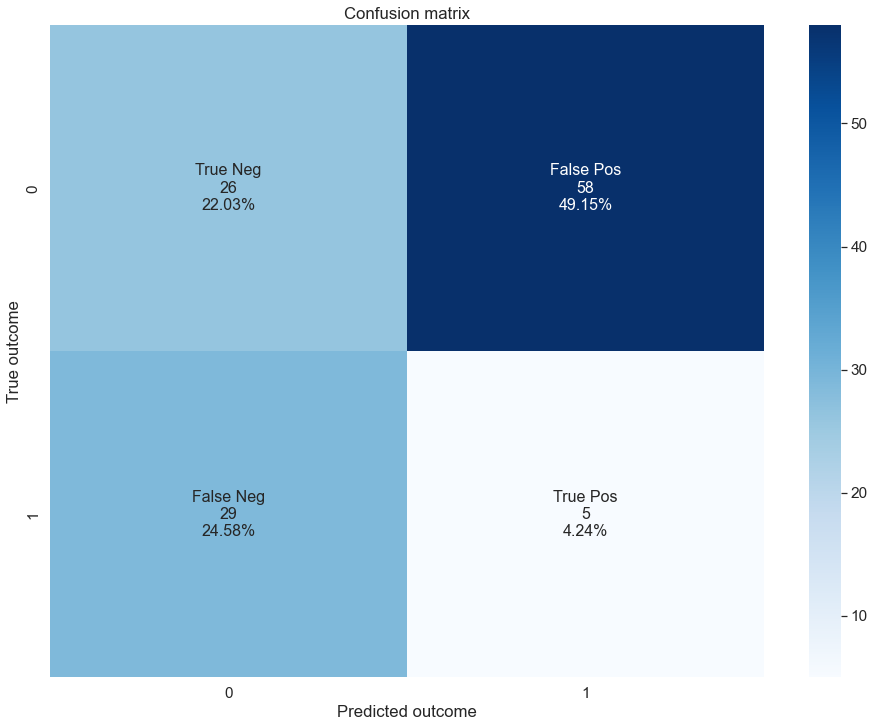

In [85]:
# Test Klasyfikatora miekkiego z procentami dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy for all: 85/118; 72.03%


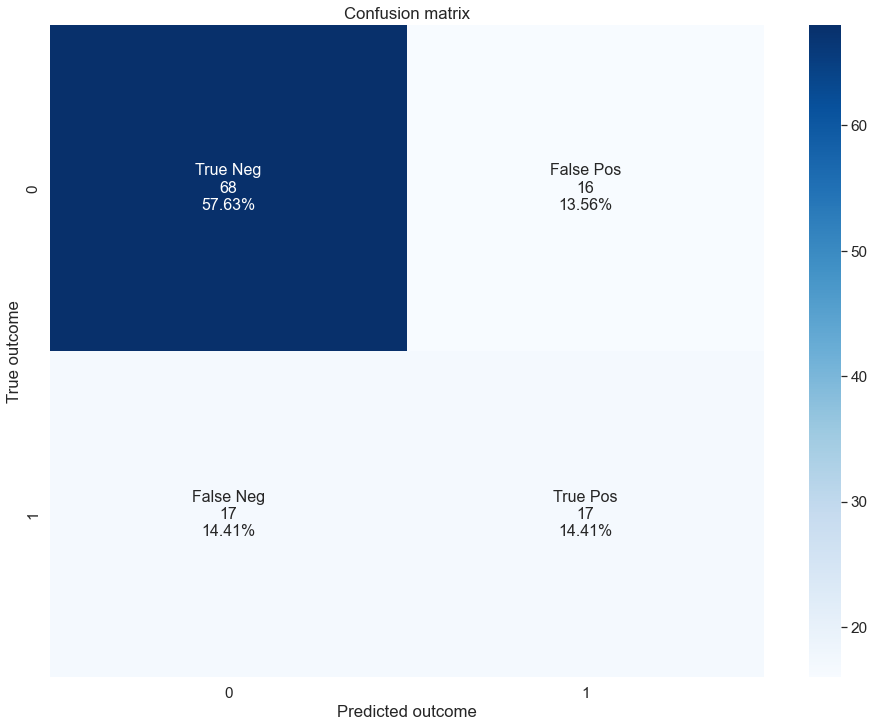

Accuracy for all: 59/118; 50.00%


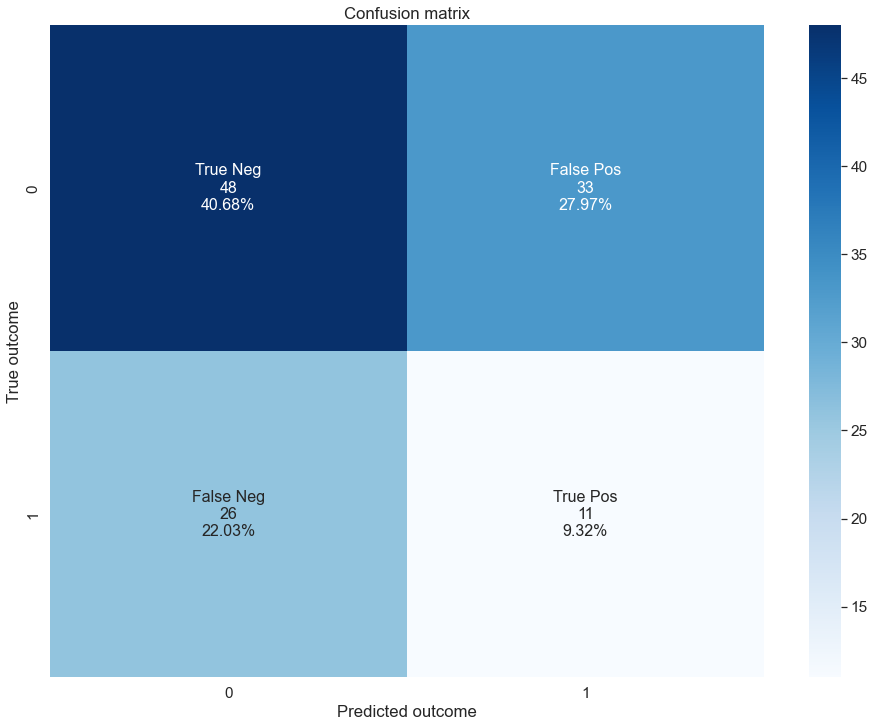

Accuracy for all: 93/118; 78.81%


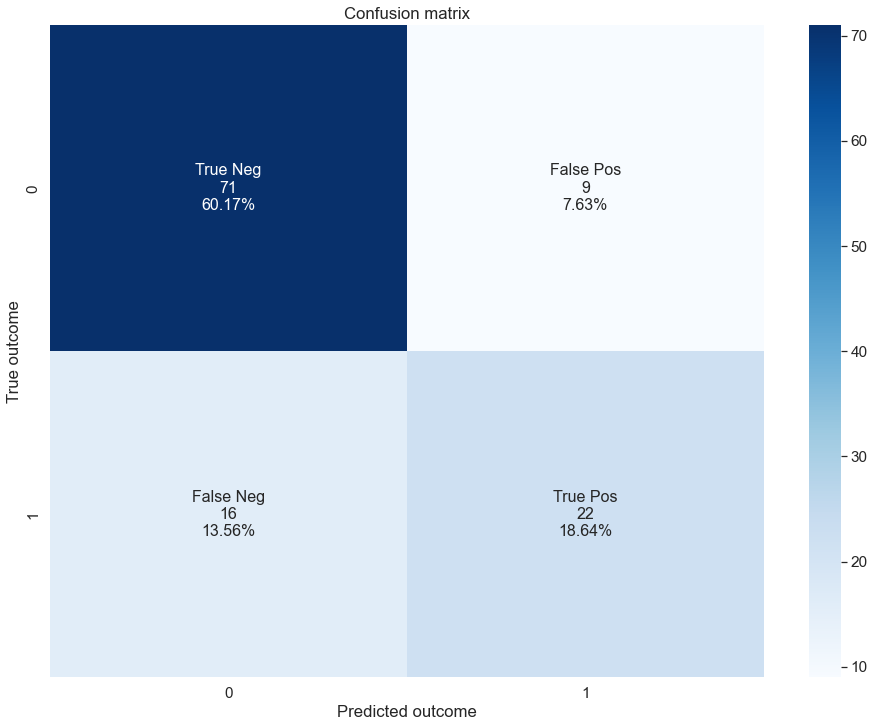

Accuracy for all: 53/118; 44.92%


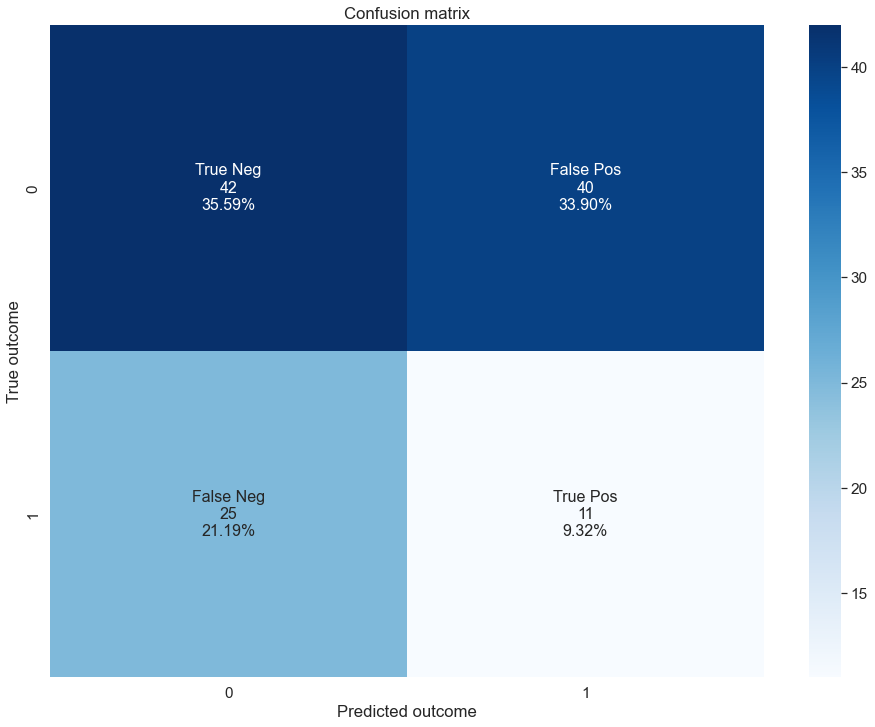

Accuracy for all: 35/118; 29.66%


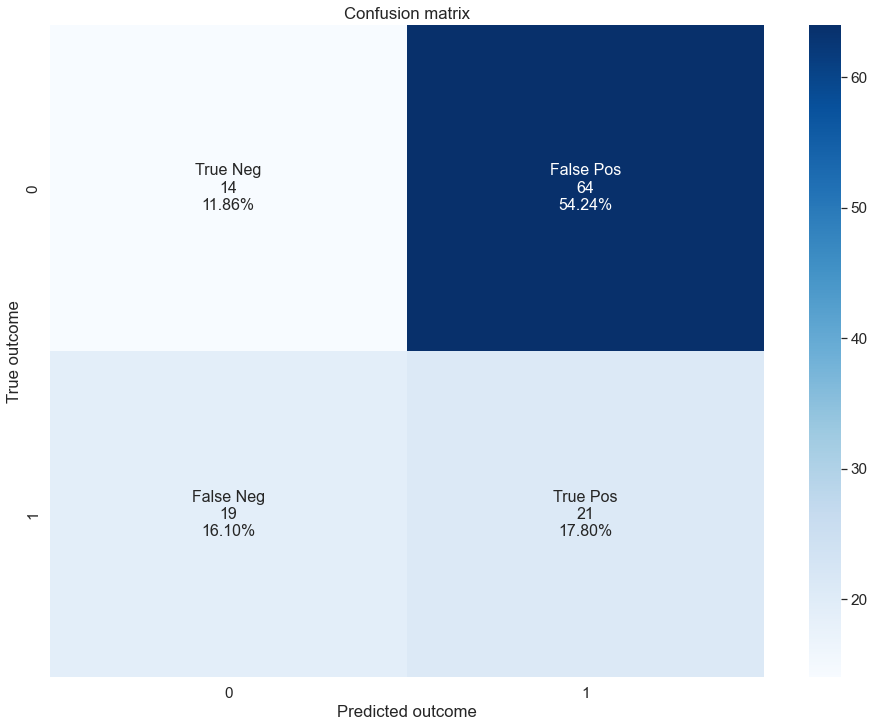

In [86]:
# Test Klasyfikatora miekkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')